# Rental attributes associated with Airbnb prices

**Group 8**: Chaitanya Thakral, Jennifer Park, Sadie Lee, Ziyang Zhou

**Course**: STAT 301

**Date**: December 6, 2025

## Introduction

As Airbnbs have become prevalent across European cities such as Budapest, understanding the factors that are associated with Airbnb prices is of particular interest. Understanding these factors can provide insights into the dynamics of short-term rentals and what may be associated with perceived value in the accomodation market.

The dataset used is from a Kaggle collection of Airbnb prices across Europe, where only Airbnbs in Budapest are examined. 

This analysis focuses on the broad question: What is the association between Airbnb listing price and rental attributes among Airbnbs in Budapest? The primary focus of the question is **inference**, where we aim to infer the Airbnb listing price based on rental attributes. In terms of rental attribute (predictors), we focus on the following: bedrooms, attraction index, room type, and person capacity to account for various dimensions of price variation. 

We note that previous literature, namely Gutierrez et al. (2017), have similarly examined factors related to Airbnb rental price, although in Barcelona, and found that proximity to attraction (similar to `attr_index`) was a dominant factor.

## Methods and results

### Data

In [2]:
# Loading libraries
library(readr)
library(fs)
library(tidyverse)
library(fs)
library(broom)
library(car)
library(knitr)

Warning message:
“package ‘readr’ was built under R version 4.4.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.2.0
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [4]:
# Read weekday and weekend Airbnb data for Budapest
budapest_weekdays_df <- read_csv("https://raw.githubusercontent.com/ChaitanyaThakral/Stat301_project/refs/heads/main/budapest_weekdays.csv")

budapest_weekends_df <- read_csv("https://raw.githubusercontent.com/ChaitanyaThakral/Stat301_project/refs/heads/main/budapest_weekends.csv")

New names:
• `` -> `...1`
Rows: 2074 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1948 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



**Source and information**

Data source: Observational data were collected by web-scraping the Airbnb website with Selenium WebDriver, four to six weeks in advance of the travel dates. The prices `realSum` refer to the full amount due for the accommodation, including any additional fees. Listings that accommodate more than six people were excluded. 

Citation: Gyódi, Kristóf, and Łukasz Nawaro. "Determinants of Airbnb prices in European cities: A spatial econometrics approach." Tourism Management 86 (2021): 104319.
- Link: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities


**Variable description:**

| Variable | Type | Description |
| ------| ----- | ------|
| realSum | Numeric     | Listing price |
| room_type | Categorical     | Room type, one of entire home/apt, private room, shared room |
| room_shared | Boolean     | 1 if room is shared, 0 otherwise |
| room_private | Boolean     | 1 if room is private, 0 otherwise |
| person_capacity | Numeric     | Maximum number of guests allowed in rental |
| host_is_superhost | Boolean     | 1 if host has superhost status, 0 otherwise |
| multi | Boolean     | 1 if host has multiple listings, 0 otherwise |
| biz | Boolean     | 1 if listing is for business purposes, 0 otherwise |
| cleanliness_rating | Numeric     | Cleanliness rating from 0-10 |
| guest_satisfaction_overall | Numeric     | Guest satisfaction rating from 0-100 |
| bedrooms | Numeric     | Number of bedrooms in listing |
| dist | Numeric     | Distance from city center |
| metro_dist | Numeric     | Distance to nearest metro station |
| attr_index | Numeric | Attraction index based on proximity/popularity of tourist attractions |
| attr_index_norm | Numeric | Normalized attraction index from 0-100 |
| rest_index | Numeric | Restaurant accessibility index |
| rest_index_norm | Numeric | Normalized restaurant index from 0-100 |
| lng | Numeric     | Longitude coordinate of listing |
| lat | Numeric     | Latitude coordinate of listing |
| weekday| Boolean| 1 if listing is for weekday, 0 otherwise |

# Exploratory Data Analysis
### Data wrangling

In [5]:
# Add a column to designate weekday (1 = weekday, 0 = weekend) to match original code
budapest_weekdays_df <- budapest_weekdays_df |>
  mutate(weekday = 1)

budapest_weekends_df <- budapest_weekends_df |>
  mutate(weekday = 0)

# Combine weekday and weekend data
airbnb_budapest <- bind_rows(budapest_weekdays_df, budapest_weekends_df)

# View the first few rows
head(airbnb_budapest)


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,238.9905,Entire home/apt,FALSE,FALSE,6,TRUE,0,1,10,⋯,1,0.3593550,0.3526430,404.4047,24.116552,893.4773,67.65685,19.05074,47.50076,1
1,300.7943,Entire home/apt,FALSE,FALSE,6,FALSE,0,1,9,⋯,2,0.9294272,0.2002355,1676.8760,100.000000,452.5397,34.26770,19.04493,47.50405,1
2,162.3819,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,⋯,1,2.4508403,0.2794518,163.5885,9.755551,191.9923,14.53825,19.02170,47.49882,1
3,118.4377,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,9,⋯,1,1.5594494,0.4779711,191.7198,11.433155,326.2156,24.70205,19.06301,47.51126,1
4,134.4174,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,⋯,2,1.1138030,0.2701016,198.6035,11.843658,635.5159,48.12322,19.06900,47.49900,1
5,127.3676,Entire home/apt,FALSE,FALSE,4,FALSE,1,0,9,⋯,2,0.2684703,0.1669317,635.6350,37.905903,1005.6535,76.15118,19.05480,47.50094,1


### Boxplot of Airbnb Prices by Room Type and Bedrooms

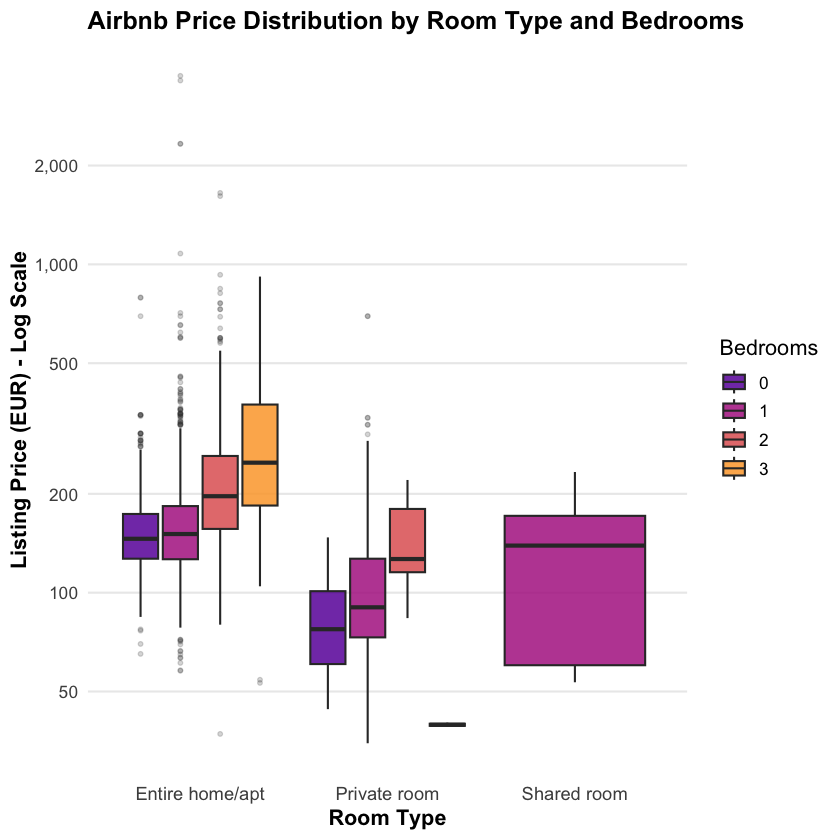

In [6]:
ggplot(airbnb_budapest, aes(x = room_type, y = realSum, fill = as.factor(bedrooms))) +
  
# Draw boxplots with slightly transparent fill and small outliers
geom_boxplot(outlier.alpha = 0.2, outlier.size = 1, alpha = 0.85,
               position = position_dodge(0.85)) +
  
# Use log scale for price to handle skewed distribution
scale_y_log10(breaks = c(50, 100, 200, 500, 1000, 2000, 5000),
                labels = scales::comma) +
# Use a visually appealing and distinguishable color palette
scale_fill_viridis_d(name = "Bedrooms", option = "plasma", begin = 0.2, end = 0.8) +
  
# Titles and axis labels
labs(
    title = "Airbnb Price Distribution by Room Type and Bedrooms",
    x = "Room Type",
    y = "Listing Price (EUR) - Log Scale",
  ) +
  
# Clean minimal theme for readability
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 15, margin = margin(b = 5)),
    plot.subtitle = element_text(size = 11, color = "gray30", margin = margin(b = 15)),
    axis.text.x = element_text(size = 11),
    axis.title = element_text(face = "bold"),
    legend.position = "right",
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank()
  )


### Boxplot Interpretation

The boxplot examines **price (response)** by **room type** and **bedrooms** (color-coded) using side-by-side boxes for comparison.

**1. Transformation Applied:**  
A log₁₀ scale was used due to the right-skewed price distribution and the presence of extremely high values. This transformation prevents expensive listings from compressing most data and allows clearer visualization of medians, quartiles, and patterns.

**2. Key Associations:**  
- **Entire homes** have premium price levels, with medians for each bedroom group generally ranging from about 150 to 300 EUR.  
- **Private rooms** are priced moderately, with medians for each bedroom group generally ranging from about 80 to 130 EUR. Most listings have 0–2 bedrooms, and price rises systematically with bedroom count.  
- **Shared rooms** are consistently priced, with medians around 120 to 140 EUR, and show limited bedroom differentiation. Most listings are one-bedroom configurations, and very few alternative options are available.

**3. Potential Problems:**  
- **Outliers:** Several high-price listings, particularly **entire homes** exceeding 2000 EUR, justify the log transformation.  
- **Multicollinearity:** Bedroom count is likely correlated with guest capacity and other size metrics. Variance inflation factor checks are recommended before regression.  
- **Unbalanced categories:** Shared rooms have fewer bedroom variations and wider interquartile ranges, indicating smaller sample sizes or heterogeneous pricing.


### Line Graph of Average Airbnb Prices by Guest Capacity and Bedrooms

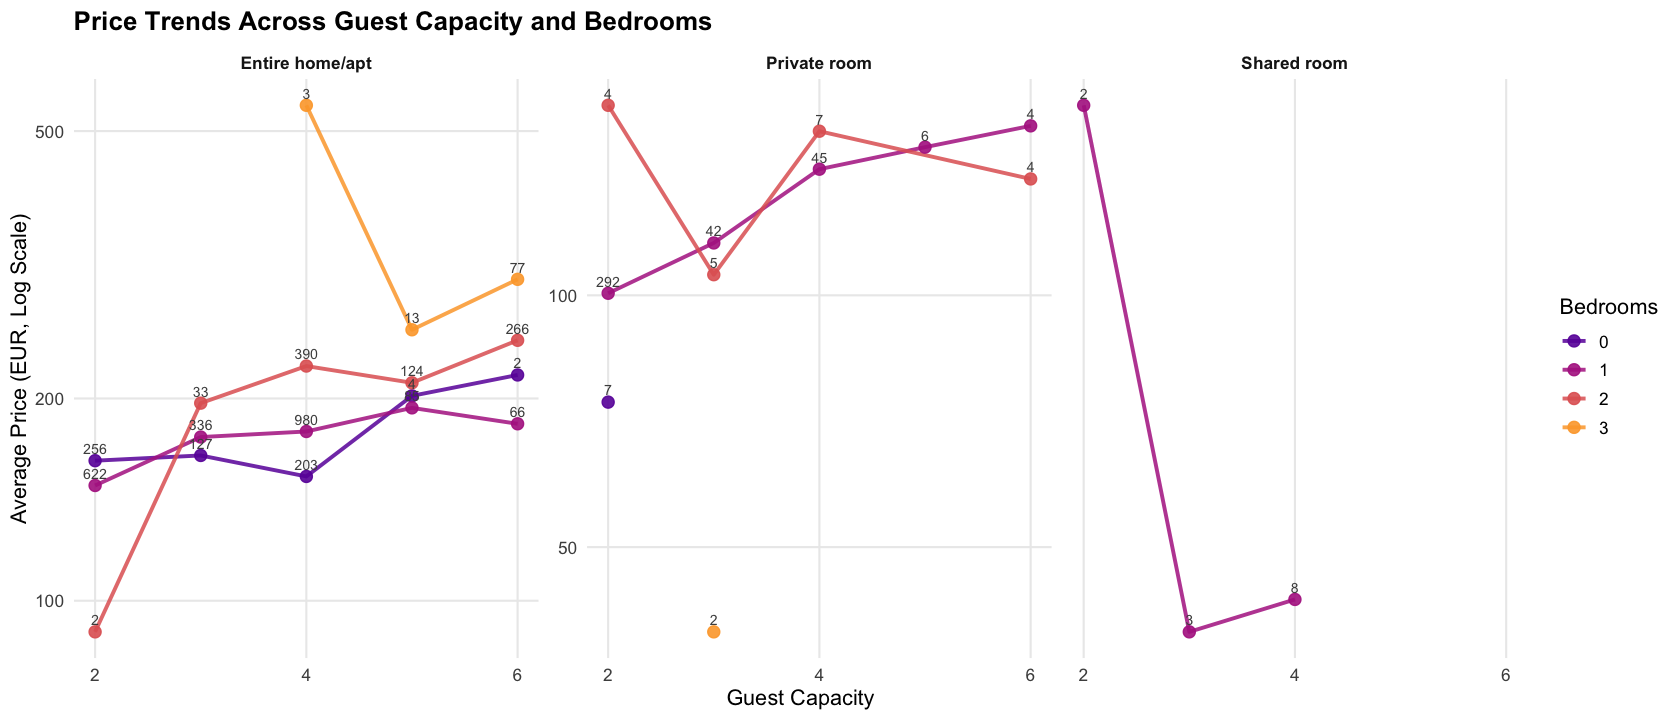

In [7]:
options(repr.plot.width = 14, repr.plot.height = 6)

# Compute average price by capacity, bedrooms, and room type
line_data <- airbnb_budapest %>%
  group_by(person_capacity, bedrooms, room_type) %>%
  summarise(mean_price = mean(realSum, na.rm = TRUE), n = n(), .groups = "drop") %>%
  filter(n >= 2)

ggplot(line_data, aes(person_capacity, mean_price,
                      color = factor(bedrooms), group = bedrooms)) +

  geom_line(linewidth = 1.1, alpha = 0.85) +  # Price trends by bedroom group
  geom_point(size = 3, alpha = 0.9) +         # Points at each capacity level
  geom_text(aes(label = n), vjust = -0.7, size = 3, color = "gray30") +  # Sample sizes

  facet_wrap(~ room_type, scales = "free_y", ncol = 3) +  # Separate panels by room type
  scale_y_log10(breaks = c(50,100,200,500,1000,2000), labels = scales::comma) +  # Log scale for skewed prices
  scale_x_continuous(breaks = seq(2, 12, 2)) +
  scale_color_viridis_d(name = "Bedrooms", option = "plasma", begin = 0.2, end = 0.8) +

  labs(
    title = "Price Trends Across Guest Capacity and Bedrooms",
    x = "Guest Capacity",
    y = "Average Price (EUR, Log Scale)"
  ) +

  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    panel.grid.minor = element_blank(),
    legend.position = "right"
  )


### Linegraph Interpretation
This line graph tracks **average price** by **guest capacity** and **bedrooms** (color-coded) across three **room types** (facets), using a **log scale** to handle price skewness.

**1. Transformation Applied:**  
A log scale was used to handle the right-skewed price distribution and extreme values, allowing trends across capacities and bedrooms to be visualized clearly.

**2. Key Associations:**  

- **Entire homes:** Prices rise steeply with capacity and bedroom count, around 150 to 500 EUR and above, showing the strongest bedroom differentiation.  
- **Private rooms:** Moderate price progression, around 100 to 300 EUR, with one to two bedroom options dominating.  
- **Shared rooms:** Mostly one-bedroom configurations, showing high variability.

**3. Potential Problems:**  

- **Multicollinearity:** Parallel upward-sloping lines indicate bedrooms and capacity move together. Higher capacity listings consistently have more bedrooms (e.g., 2-person = 0–1 BR, 6-person = 2–3 BR). This diagonal pattern provides evidence of high correlation, suggesting redundant information if both variables are included in a model, which can inflate VIF and standard errors.  
- **Small samples:** Points with n < 10, especially in shared rooms, represent unreliable estimates.


### Summary Table of Airbnb Listings by Room Type

In [9]:
# Creating a summary table grouped by Room Type
summary_table <- airbnb_budapest %>%
  group_by(room_type) %>%
  summarise(
    N = n(),
    Mean_Price = round(mean(realSum, na.rm = TRUE), 0),
    Median_Price = round(median(realSum, na.rm = TRUE), 0),
    SD_Price = round(sd(realSum, na.rm = TRUE), 0),
    IQR_Price = round(IQR(realSum, na.rm = TRUE), 0),
    Avg_Capacity = round(mean(person_capacity, na.rm = TRUE), 1),
    Avg_Attr_Index = round(mean(attr_index, na.rm = TRUE), 1),
    Unique_Bedrooms = n_distinct(bedrooms),
    Missing_Values = sum(is.na(realSum) | is.na(person_capacity) | 
                         is.na(attr_index) | is.na(bedrooms))
  ) 
# Print clean table
kable(summary_table, 
      caption = "Summary of Airbnb Listings by Room Type",
      col.names = c("Room Type", "N", "Mean Price", "Median Price", "SD Price", 
                    "IQR Price", "Avg Capacity", "Avg Attr Index", 
                    "Unique Bedrooms", "Missing Values"))




Table: Summary of Airbnb Listings by Room Type

|Room Type       |    N| Mean Price| Median Price| SD Price| IQR Price| Avg Capacity| Avg Attr Index| Unique Bedrooms| Missing Values|
|:---------------|----:|----------:|------------:|--------:|---------:|------------:|--------------:|---------------:|--------------:|
|Entire home/apt | 3589|        185|          159|      135|        73|          3.7|          218.6|               4|              0|
|Private room    |  419|        109|           91|       63|        54|          2.5|          161.6|               4|              0|
|Shared room     |   14|        127|          139|       61|       111|          3.6|          151.4|               1|              0|

### Methods: Plan

We fit 3 models in total with Airbnb price (`realSum`) as the response variable: 2 simple linear regression models and 1 additive multiple linear regression model. Note that because of the right-skew of `realSum`, we log-transform this response variable when fitting the model. This addresses the assumption of normality in linear regression models.

#### Simple Linear Regression (SLR) Models

To begin the analysis, we fitted two simple linear regression (SLR) models to explore how individual predictors are associated with Airbnb prices (`realSum`). The goal of these models is to examine basic one-to-one relationships before introducing additional covariates in multivariable settings. We selected one structural predictor (`bedrooms`) and one location-based predictor (`attr_index`) to capture two different dimensions of price variation.

**Model Descriptions**

The SLR models are defined as:
1. **SLR 1 (Structural Feature):**  
   $\text{realSum} = \beta_0 + \beta_1(\text{bedrooms}) + \epsilon$  
2. **SLR 2 (Location Feature):**  
   $\text{realSum} = \beta_0 + \beta_1(\text{attr\_index}) + \epsilon$  

Each model isolates a single predictor to provide a clear view of its individual association with price, without the influence of other variables.

**Justification of Model Choices**

These two predictors were intentionally selected to avoid redundancy while representing distinct factors that are commonly related to rental pricing. `bedrooms` reflects listing size and serves as a natural structural indicator, while `attr_index` captures how attractive or amenity-dense the surrounding area is. Including one structural and one environmental variable ensures the SLR models offer complementary insights. Preliminary exploration also suggested that both variables show noticeable trends with price, making them reasonable candidates for focused simple-regression analysis.

**Model Assessment Plan**

To evaluate whether SLR appropriately captures each relationship, we will examine standard diagnostic plots as well as coefficient estimates, their $p$-values and confidence intervals: 
- Q–Q plots: to evaluate normality of residuals, which supports valid inference.

These diagnostics help determine whether SLR provides an adequate first-step description of each predictor–response association and guide decisions about transformations or adjustments before extending the analysis to multiple regression.

#### Additive Multiple Linear Regression (MLR) Model

Following the SLR analysis, we use an additive MLR to examine the associations between Airbnb listing price (`realSum`) and attributes of the rental. We select the following predictors to capture various dimensions of how the listing price may differ: `room_type` (categorical with 3 levels), `bedrooms` (numeric discrete), `person_capacity` (numeric discrete), and `attr_index` (numeric continuous). 

**Model Description**

The MLR model is defined as,
$$
\text{realSum} = \beta_0 + \beta_1(\text{room\_type}_{\text{Private room}}) + \beta_2(\text{room\_type}_{\text{Shared room}}) + \beta_3(\text{bedrooms}) + \beta_4(\text{person\_capacity}) + \beta_5(\text{attr\_index})
$$

**Justification of Model Choices**

An additive model is considered appropriate for the research question since it aims to examine the associations between listing price and attributes of the rental. 

**Model Assessment Plan**

To evaluate whether the MLR sufficiently captures the relationships between covariates and the rental listing price, we will examine: 
- Coefficient estimates and their $p$-values
- Compute VIF to examine presence of multicollinearity, and support valid inference.

### Code and Results

#### Simple Linear Regression Models

In [14]:
# Prepare data

airbnb_slr_df <- airbnb_budapest |> select('realSum', 'bedrooms', 'attr_index')
head(airbnb_slr_df)

realSum,bedrooms,attr_index
<dbl>,<dbl>,<dbl>
238.9905,1,404.4047
300.7943,2,1676.8760
162.3819,1,163.5885
118.4377,1,191.7198
134.4174,2,198.6035
127.3676,2,635.6350


In [35]:
# SLR 1 - structural (bedrooms)

# Fit the model
SLR_bedrooms <- lm(log(realSum) ~ bedrooms, data=airbnb_slr_df)

# View results
SLR_bedrooms_results <- tidy(SLR_bedrooms, conf.int=TRUE) |> mutate_if(is.numeric, round, 2)
SLR_bedrooms_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.86,0.01,393.22,0,4.84,4.89
bedrooms,0.18,0.01,19.25,0,0.17,0.20


**SLR 1 Interpretation**

Each additional bedroom is associated with an expected $19.7\%$ (`exp(0.18) - 1 * 100%`) increase in rental price (`realSum`). At a significance level of $0.05$, the number of bedrooms is statistically significant with a $p$-value of $0$ (rounded). With a $95\%$ confidence interval, we then estimate that a 1 bedroom increase is associated with a $18.53\%$ to $22.14\%$ increase in rental price, with $95\%$ confidence. This means that in roughly $95\%$ of random samples, the confidence interval we calculate will capture the true amount of increase in rental price in the population associated with a 1 bedroom increase.

**SLR 1 Q-Q Resiudal Plot**

From the Q-Q plot below, we can see that the distribution is roughly normal, supporting valid inference, however, the distribution is still right-tailed with a few large outliers pulling the distribution upwards. Thus, it may be the case that the model is under-fitting Airbnb prices for the most expensive rental properties, which may make sense in practice given that 'luxury' or properties that are unusally expensive may behave differently than normal. This may also make sense for an SLR, such that the singular predictor of `bedrooms` may not adequately capture the full behavior of rental price and other predictors are needed.

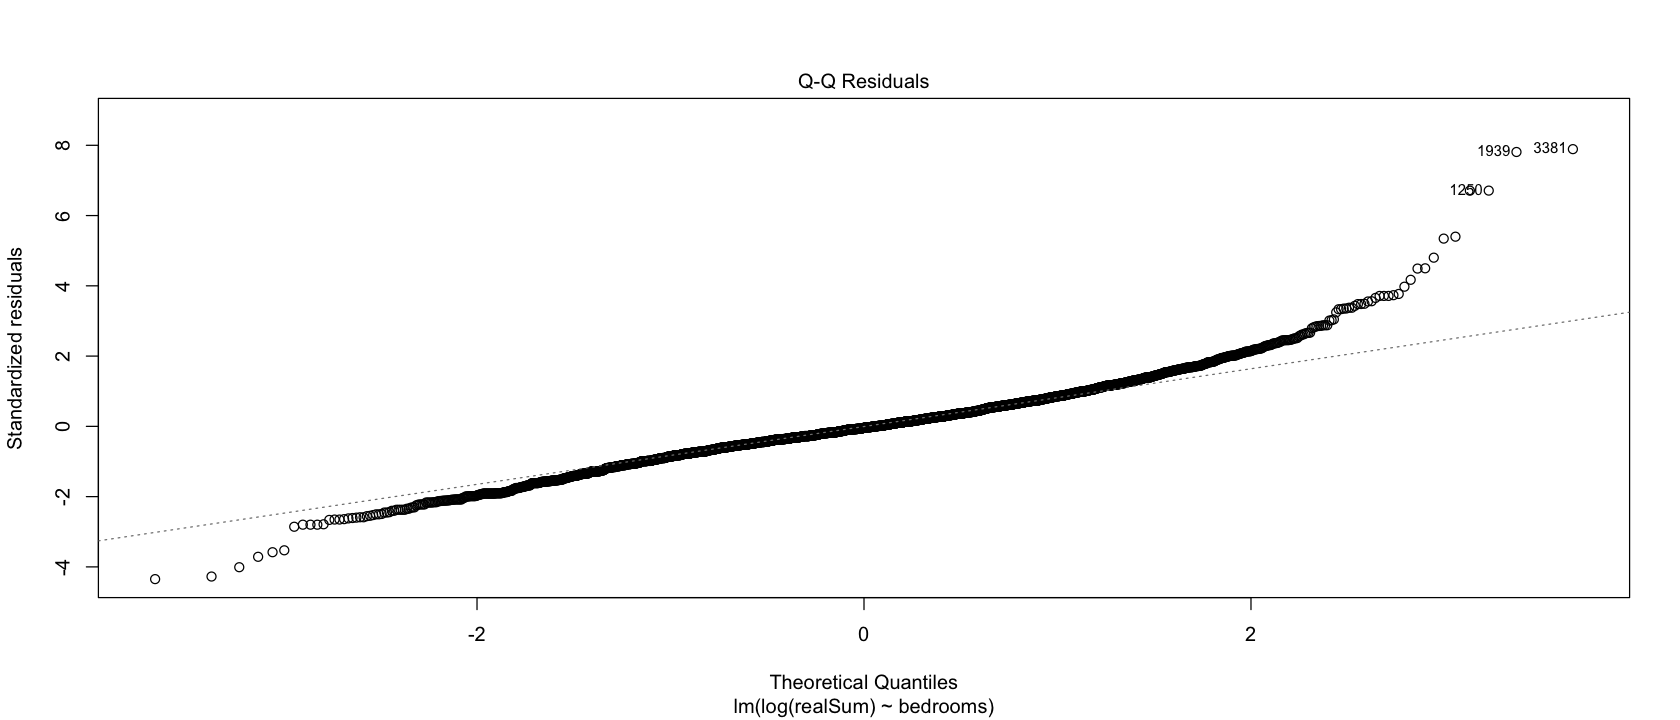

In [37]:
plot(SLR_bedrooms, 2)

In [63]:
# SLR 2 - location (attr_index)

# Fit the model
SLR_attr <- lm(log(realSum) ~ attr_index, data=airbnb_slr_df)

# View results
SLR_attr_results <- tidy(SLR_attr, conf.int=TRUE) |> mutate_if(is.numeric, round, 4)
SLR_attr_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.8557,0.0138,352.5915,0,4.8287,4.8827
attr_index,0.0010,0.0001,17.2812,0,0.0009,0.0011


**SLR 2 Interpretation**

A 1 point increase in attraction index (`attr_index`) is associated with an expected $0.1\%$ increase in rental price (`realSum`). At a significance level of $0.05$, the attraction index of an Airbnb is statistically significant with a $p$-value of $0$ (rounded). With a $95\%$ confidence interval, we then estimate that a 1 point increase in attraction index is associated with a $0.09\%$ to $0.11\%$ increase in rental price, with $95\%$ confidence. This means that in roughly $95\%$ of random samples, the confidence interval we calculate will capture the true amount of increase in rental price in the population associated with a 1 point increase in attraction index.

**SLR 2 Q-Q Residuals Plot**

Similar to the first Q-Q plot above, we can see that the distribution is roughly normal, supporting valid inference, however, the distribution is also right-tailed with a few large outliers pulling the distribution upwards. Again, the model may then underfit prices for the most expensive properties, and the singular predictor of attraction index may not fully capture the full behavior of rental prices.

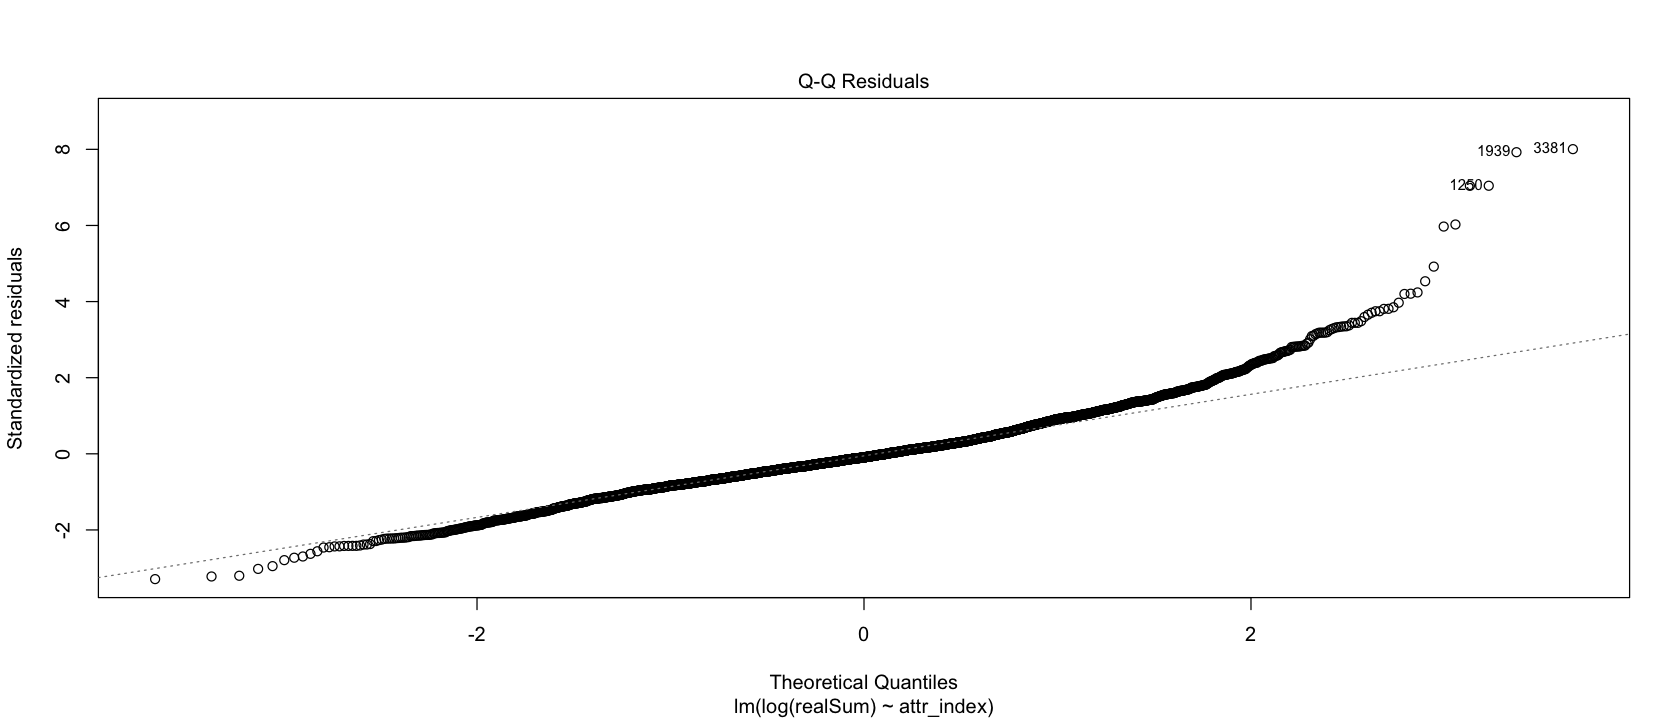

In [41]:
plot(SLR_attr, 2)

#### Additive Multiple Linear Regression Model

In [28]:
# Prepare data with relevant columns
airbnb_mlr_df <- airbnb_budapest |> select('realSum', 'room_type', 'bedrooms', 'person_capacity', 'attr_index')
head(airbnb_mlr_df)

realSum,room_type,bedrooms,person_capacity,attr_index
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
238.9905,Entire home/apt,1,6,404.4047
300.7943,Entire home/apt,2,6,1676.8760
162.3819,Entire home/apt,1,4,163.5885
118.4377,Entire home/apt,1,2,191.7198
134.4174,Entire home/apt,2,4,198.6035
127.3676,Entire home/apt,2,4,635.6350


In [87]:
# Fit the model
MLR_add <- lm(log(realSum) ~ ., data=airbnb_mlr_df)

# View results
MLR_add_results <- tidy(MLR_add, conf.int=TRUE) |> mutate_if(is.numeric, round, 4)
MLR_add_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.5854,0.0209,219.3751,0e+00,4.5444,4.6264
room_typePrivate room,-0.3965,0.0195,-20.3539,0e+00,-0.4347,-0.3583
room_typeShared room,-0.3361,0.0950,-3.5386,4e-04,-0.5223,-0.1499
bedrooms,0.1089,0.0101,10.8224,0e+00,0.0891,0.1286
person_capacity,0.0681,0.0055,12.2935,0e+00,0.0572,0.0790
attr_index,0.0008,0.0001,15.0375,0e+00,0.0007,0.0009


**MLR Interpretation**

Keeping all other covariates in the model constant, **private rooms** are associated with an expected decrease of $49.18\%$ in rental price compared to entire homes/apartments (reference), which is statistically significant with a $p$-value of $0.00$ (rounded) at a $0.05$ significance level. Keeping all other covariates in the model constant, **shared rooms** are associated with an expected decrease of $40.49\%$ in rental price compared to entire homes/apartments (reference), which is statistically significant with a $p$-value of $0.00$ at a $0.05$ significance level. Keeping all other covariates in the model constant, each additional **bedroom** is associated with an expected increase of $11.63\%$ in rental price, which is statistically significant with a $p$-value of $0.00$ (rounded) at a $0.05$ significance level. Keeping all other covariates in the model constant, each additional **person** in terms of rental capacity is associated with an expected increase of $7.25\%$ in rental price, which is statistically significant with a $p$-value of $0.00$ (rounded) at a $0.05$ significance level. Keeping all other covariates in the model constant, a 1 point increase in **attraction index** is associated with an expected increase of $0.08\%$ in rental price, which is statistically significant with a $p$-value of $0.00$ (rounded) at a $0.05$ significance level.

In [45]:
# Compute VIF

MLR_vif <- vif(MLR_add)
MLR_vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.134815,2,1.032123
bedrooms,1.425627,1,1.193996
person_capacity,1.551171,1,1.245460
attr_index,1.027135,1,1.013477


**VIF interpretation**

With generalized VIF (GVIF) values for all covariates around $1$, i.e. not greater than $\sqrt{5}$ or $\sqrt{10}$, this indicates that there is not problematic collinearity between covariates for the fitted additive MLR model. 

## Discussion

To summarize, our analysis examined how key rental attributes such as, bedrooms, attraction index, room type, and person capacity, are associated with Airbnb listing prices in Budapest. 

Our findings from the Airbnb listings data suggests stong differences across room types and bedroom counts with entire homes almost consistently having higher prices than private or shared rooms. In the regression models, private rooms were priced about 33% lower and shared rooms about 29% lower than entire homes (even after adjusting for all covariates). 

Both bedrooms and guest capacity were very meaningful predictors of price. They are related, but are not exactly the same thing. Capacity still has its own effect on price. For each additional bedroom, the simple regression showed a strong 19-22% increase in price. But, the percent was 11-12% after capacity and other attributes were included. Capacity showed an independent effect on price which was roughly a 7% increase for every additional guest accommodated. This shows that the size of the property and the functional utility it provides to guests affect price. 

Attraction index had a smaller positive per-unit effect than other variables. There was only a 0.08% increase in price per unit, but the variable has a much larger numerical range. This means that highly attractive neighborhoods have substantial price differences.

As expected, all covariates used in the MLR are statistically significant in their association with listing price. Given the literature of Gutierrez et al. (2017), which found that proximity to attractions was a dominant factor in Airbnb prices in Barcelona, it was unexpected that the attraction index covariate in our MLR did not have as strong of an influence on the expected listing price in Budapest, i.e. the estimated coefficient was smaller in magnitude compared to the other predictors used in the model.

The study by Gutiérrez et al showed that proximity to attractions, neighborhood desirability, and spatial location were among the strongest predictors of Airbnb price, which aligned with our findings. But there were some other outcomes that surprised us. In the line plot listings with more bedrooms almost always had higher capacity. This made number of bedrooms and capacity appear highly correlated, but this was not the case as both had low VIF values and no multicollinearity problems.

To improve the model, more covariates other than those examined could be added to the MLR to see other factors that may be associated with listing price. Additionally, adding interaction terms between some covariates (if more are added) may be beneficial if the effects of some predictor depends on the level of another. 

The SLR and MLR models are good for most listings, but not great for super expensive Airbnbs. The most expensive Airbnbs have the biggest errors according to the residual plots. There are probably many other variables that affect Airbnb pricing such as rooftop views, designer interior, and whether or not there’s a hottub or swimming pool.

Future research could examine if these rental attributes could be used to predict an Airbnb’s listing price, i.e. prediction instead of inference, as well as explore the most important predictors of an Airbnb’s listing price. We could also explore how prices change depending on the time. (Ex. comparing weekday versus weekend listings or seasonal trends) We can also try to have a better model to better represent luxury listings. We could also research how Airbnb markets are heavily affected by major events for tourists.

## References

1. J. Gutiérrez, J. C. García-Palomares, G. Romanillos, and M. H. Salas-Olmedo, “The eruption of Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer accommodation in Barcelona,” Tourism Management, vol. 62, pp. 278–291, Oct. 2017, doi: 10.1016/j.tourman.2017.05.003.